<a href="https://colab.research.google.com/github/JasurAI/course-Data-Science-and-AI/blob/main/ML_turlari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning** Algoritmi turlari:

* Supervised Learning:
1. Regression (Regressiya) ML algoritmlari
2. Classification (Klassifikatsiya) ML algoritmlari
* Unsupervised Learning
3. Clustering (Klasterlash) ML algoritmlari

---



# **1. Regressiya (Regression)**

# **Linear Regression**

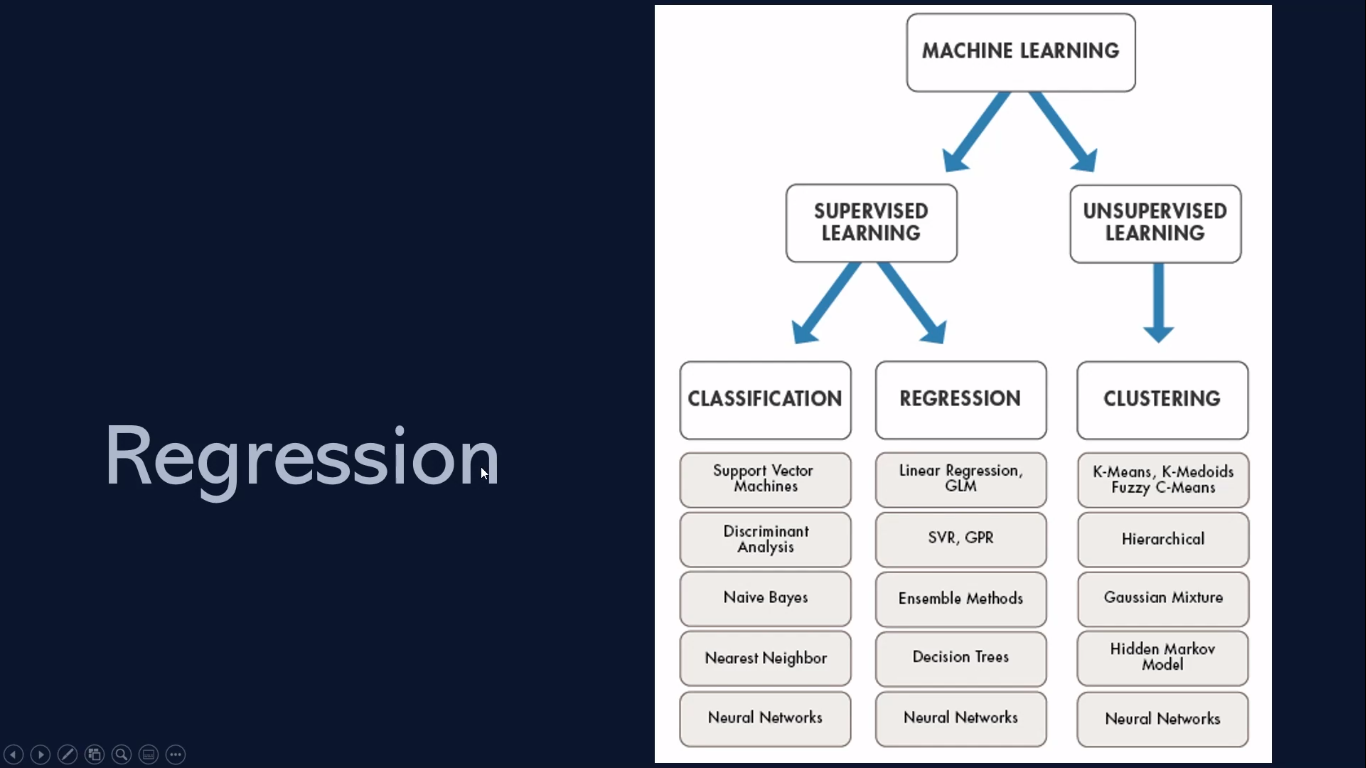

Regressiya (Regression) - davomiy qiymatlarni prognoz (bashorat) qilish jarayoni.

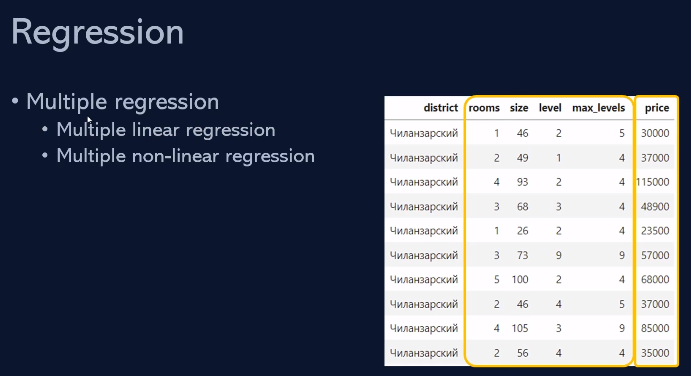

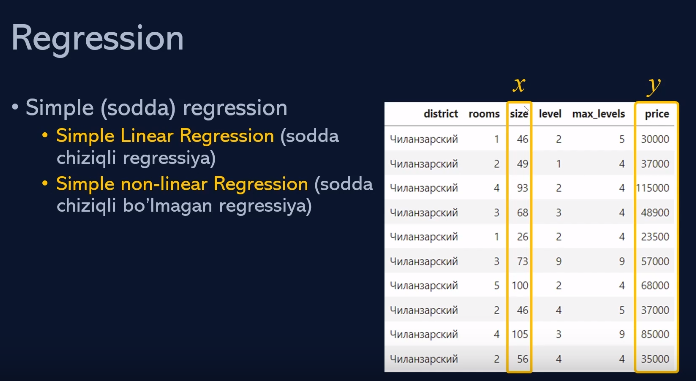

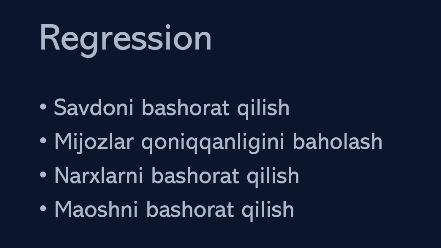

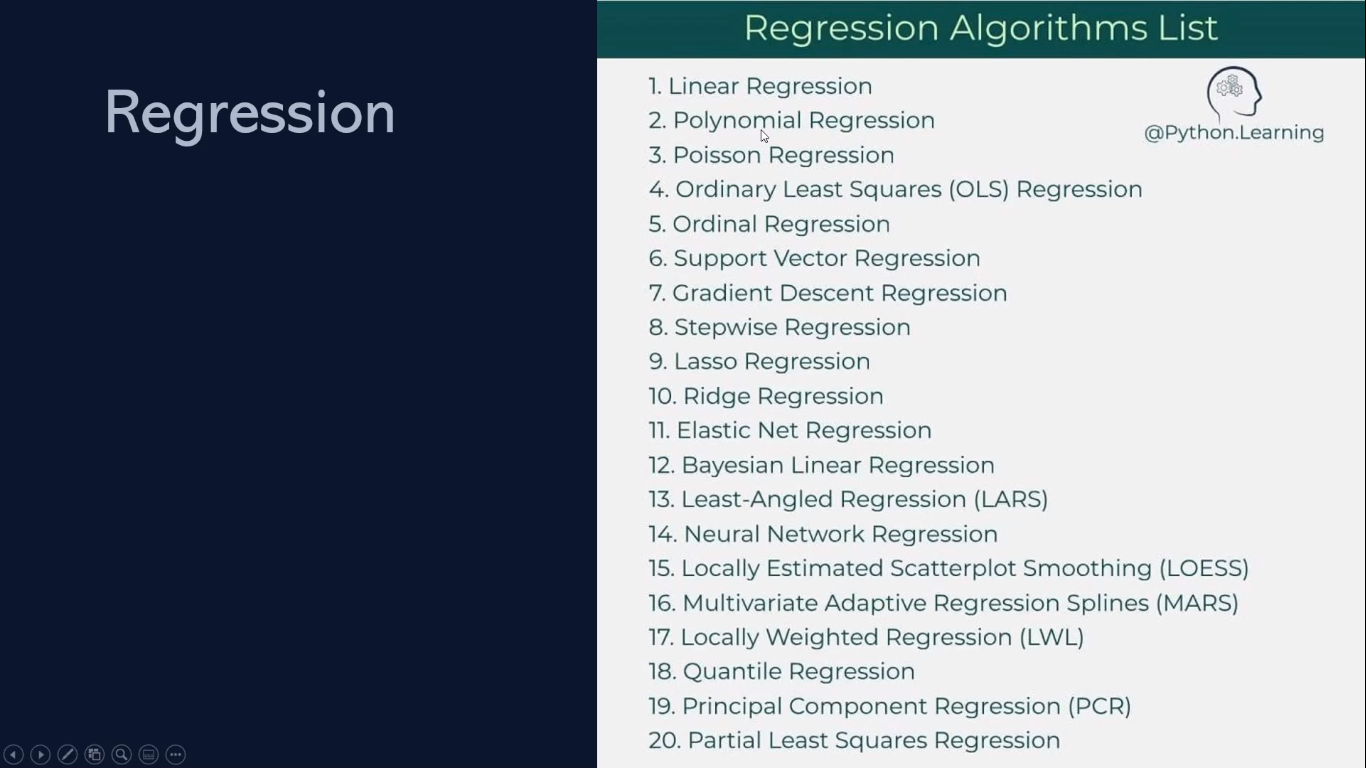

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/JasurAI/course-Data-Science-and-AI/main/housing_price_dataset.csv', index_col=0)
df.head()

In [ ]:
df['district'].value_counts()

Darsimiz uchun Chilonzor tumanidagi uylarning narxini bashorat qilib ko'ramiz.

In [ ]:
housing = df[df.district=='Чиланзарский']
housing.head()

In [ ]:
housing.describe()

In [ ]:
X = housing['size']
X

In [ ]:
Y = housing['price']
Y

**Narx va uy maydoni o'rtasida chiziqli bog'liqlik bor ekanini tekshirib ko'ramiz.**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

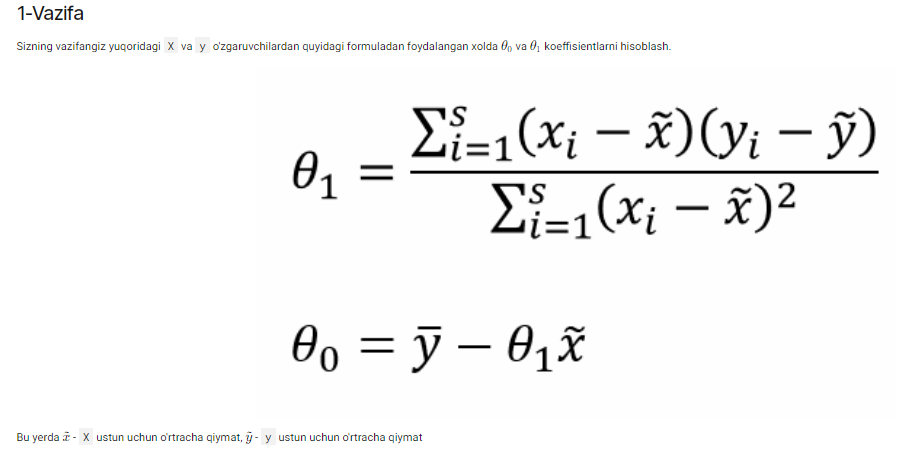

In [ ]:
x_urta = sum(X)/X.shape[0] # np.mean(X)
y_urta = sum(Y)/Y.shape[0] # np.mean(Y)

tetta1 = sum((X-x_urta)*(Y-y_urta))/sum((X-x_urta)**2)
tetta0 = y_urta - tetta1*x_urta
print('tetta1 = ', np.rint(tetta1))
print('tetta0 = ', np.rint(tetta0))

**2-Vazifa**

`X` dan bir nechta tasodifiy qiymatlarni ajratib oling va ularga mos keluvchi `Y` ni yuqoridagi koeffisientlar yordamida hisoblab ko'ring.

**Yi = tau0 + tau1*Xi**

In [ ]:
test = housing[['size', 'price']].sample(20)
test

In [ ]:
test['pridected'] = 0
for i in test.index:
  y_pridected = tetta0 + tetta1*test.loc[i, 'size']
  test['pridected'][i] = np.rint(y_pridected)
y_test = test['price']

**3-Vazifa**

Hisoblangan va asl qiymtlar o'rtasidagi `RMSE` (**root mean square error**), `MAE` (**mean absolute error**) hisoblang.

In [ ]:
MAE = sum(np.abs(y_pridected - y_test))/test.shape[0]
RMSE = np.sqrt(sum(np.square(y_pridected - y_test))/test.shape[0])

print('MAE = ', MAE)
print('RMSE = ', RMSE)

# **Scikit-learn yordamida LR**

Keling endi yuqoridagi amallarni scikit-learn yordamida bajaramiz.

Avvalo ma'lumotlarni train va testga bo'lib olamiz.

In [ ]:
housing.shape

Bizda ma'lumotlar kam, shuning uchun 10% test uchun olamiz

**Ustunlar ta'rifi**
* `location` - sotilayotgan uy manzili
* `district` - uy joylashgan tuman
* `rooms` - xonalar soni
* `size` - uy maydoni (kv.m)
* `level` - uy

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.10, random_state=42)

Linear Regression ML

In [ ]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])

# Modelni tarbiyalaymiz (train)
LR_model.fit(x_train, y_train)

#theta1 va theta0 koeefisentlarni ajratib olamiz
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print (f'{theta1=}')
print (f'{theta0=}')

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel("Size")
plt.ylabel("Price")

> **Modelni baholaymiz**

In [ ]:
x_test = np.asanyarray(test_set[['size']])
y_test = np.asanyarray(test_set[['price']])

In [ ]:
y_predict = LR_model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"{MAE=}")
print(f"{RMSE=}")

> **Amaliyot. Simple Linear Regression**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head(20)

Yuqoridagi jadvalda MohirDev MChJ tomonidan turli OAV larda (`TV`, `Radio`, `Newspaper`) berilgan reklamalar soni va mos keluvchi savdolar (`Sales`) berilgan.

Sizning vazifangiz:

1. Aynan qaysi turdagi OAVda reklama berish savdo o'sishiga ta'sir qiladi aniqlash.
2. Topilgan bog'liqlik asosida **Simple Linear Regression** algorithmi yordamida bashorat modelini qurish.

Ushbu amaliyotda sizning vazifangiz berilgan dataset yordamida **Simple Linear Regression** model yaratish:

* CRISP-DM metodologiyasiga amal qiling!
* **Simple linear regression** qo'llash uchun 1 ta ustunni tanlab oling.

# **Multiple Linear Regression**

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head(10)

In [ ]:
housing = df[df.district=='Чиланзарский']
housing.head()

**Train/Test split**

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.10, random_state=42)

**ML**

In [ ]:
from sklearn import linear_model
MLR_model = linear_model.LinearRegression()
# x_train = np.asanyarray(train_set[['rooms','size','level','max_levels']])
x_train = np.asanyarray(train_set[['size','max_levels']])
y_train = np.asanyarray(train_set[['price']])
MLR_model.fit (x_train, y_train)
# Koeffisientlar (theta1, theta2, ...)
print('Coefficients: ', MLR_model.coef_)
print('theta0:', MLR_model.intercept_)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.pairplot(df[['rooms','size','level','max_levels','price']])
plt.show()

**Modelni baholaymiz**

In [ ]:
# x_test = np.asanyarray(test_set[['rooms','size','level','max_levels']])
x_test = np.asanyarray(test_set[['size','max_levels']])
y_test = np.asanyarray(test_set[['price']])
y_predict = MLR_model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"{MAE=}")
print(f"{RMSE=}")

# **Non-Linear Regression**

## **Polynomial Regression**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv"

df = pd.read_csv(url)
df.head(10)

In [ ]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

**Ma'lumotlarni ajratib olamiz va Normalizasiya qilamiz**

In [ ]:
X = np.asanyarray(df[['Year']]/df.Year.max())
y = np.asanyarray(df[['Value']]/df.Value.max())

**Linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

In [ ]:
yhat = model.predict(X)

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(X, y, 'ro', label='data')
plt.plot(X,yhat, linewidth=3.0, label='fit')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

print("MAE:", mean_absolute_error(yhat,y))

In [ ]:
X[0]

> **Polynomial regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
model.fit(X_poly, y)

In [ ]:
yhat = model.predict(X_poly)

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(X, y, 'ro', label='data')
plt.plot(X,yhat, linewidth=4.0, label='fit')
plt.show()

In [ ]:
print("MAE:", mean_absolute_error(yhat,y))

> **`curve_fit`**

'curve_fit' yordamida o'zimiz yozgan funksiyalar asosida model qurishimiz mumkin.

Misol uchun, yuqoridagi ma'lumotlar `Logistic` regression funksiyasi yordamida aniqroq bashorat qilinishi mumkin.

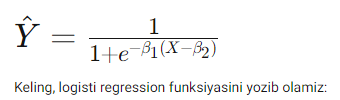

In [ ]:
x_data, y_data = (df["Year"].values, df["Value"].values)
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [ ]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [ ]:
from scipy.optimize import curve_fit

beta, pcov = curve_fit(sigmoid, xdata, ydata)
print(f"beta1={beta[0]}\nbeta2={beta[1]}")

In [ ]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
yhat = sigmoid(x, *beta)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,yhat, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [ ]:
print("MAE:", mean_absolute_error(yhat,ydata))

# **Underfitting va Overfitting**

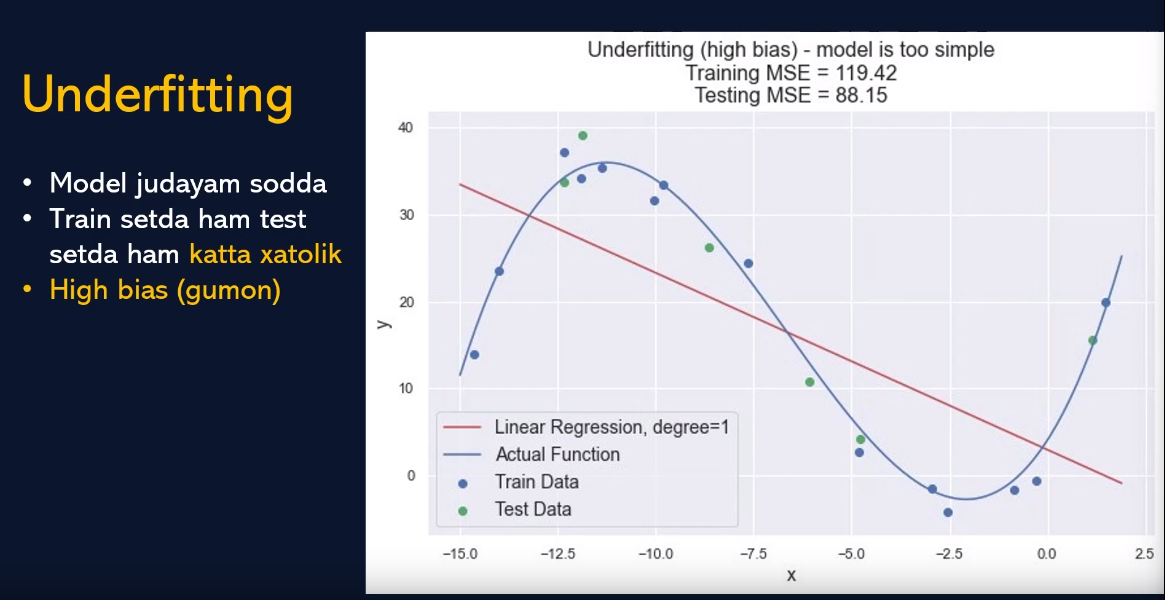

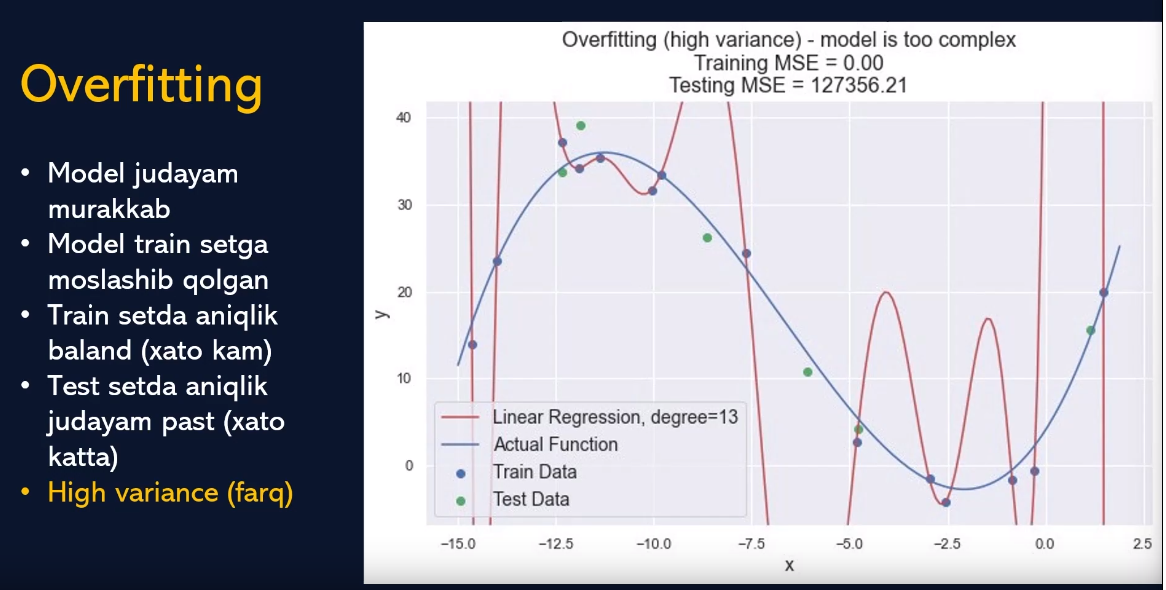

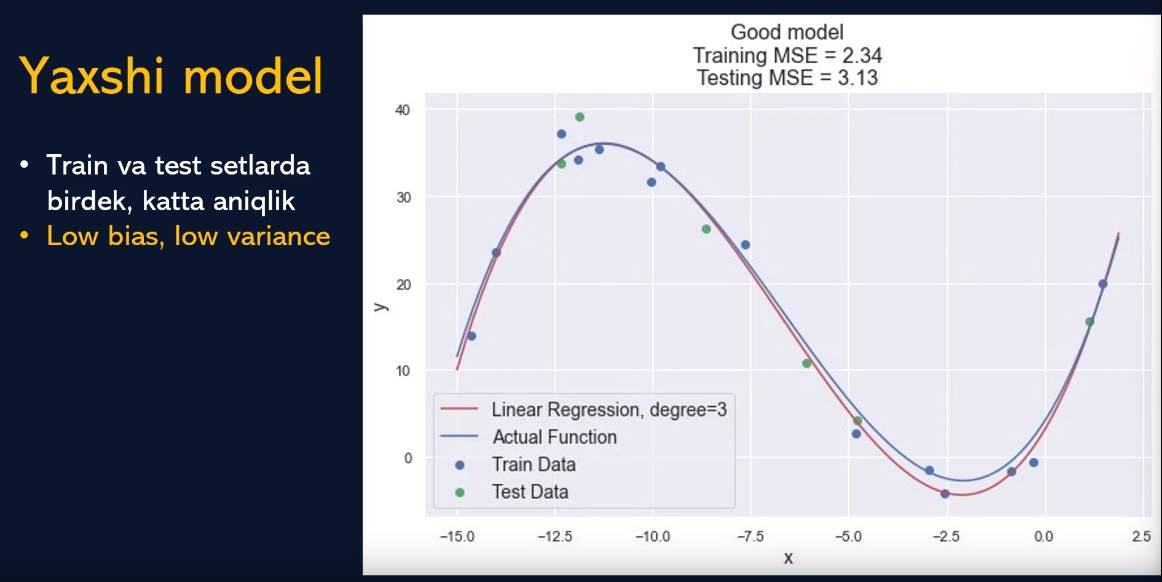

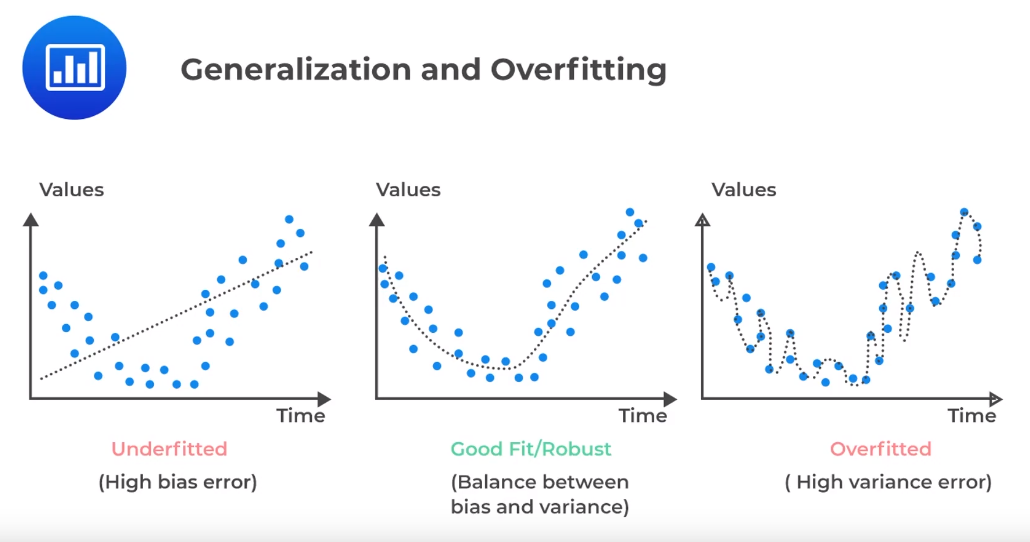

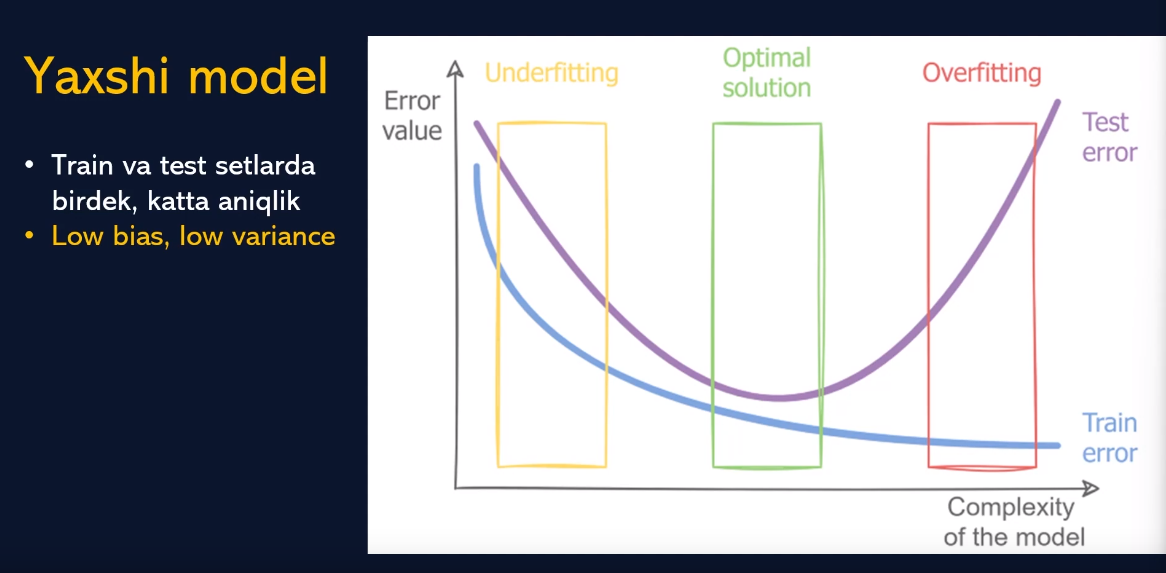

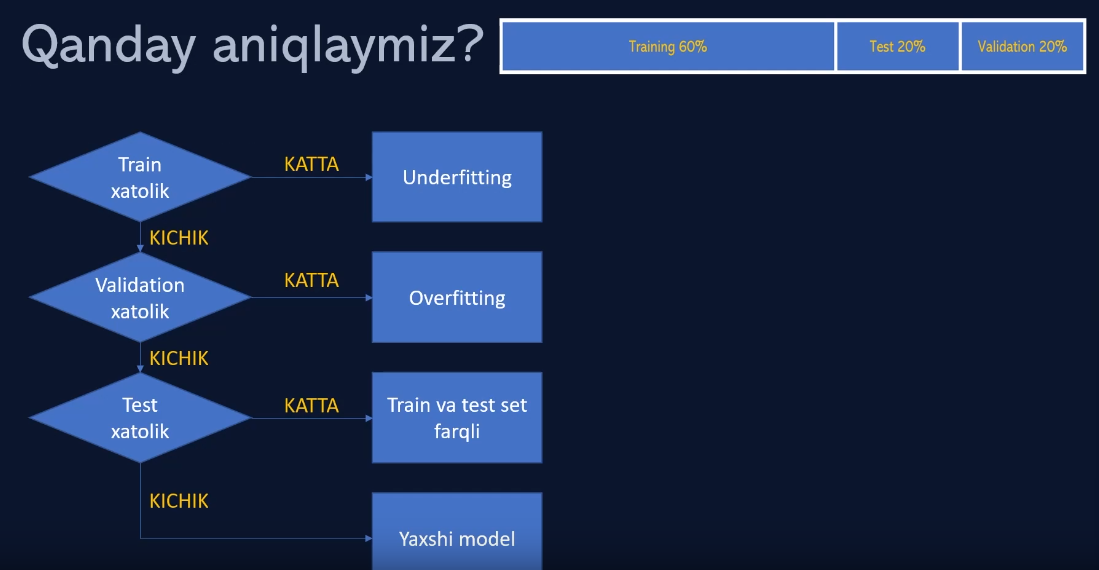

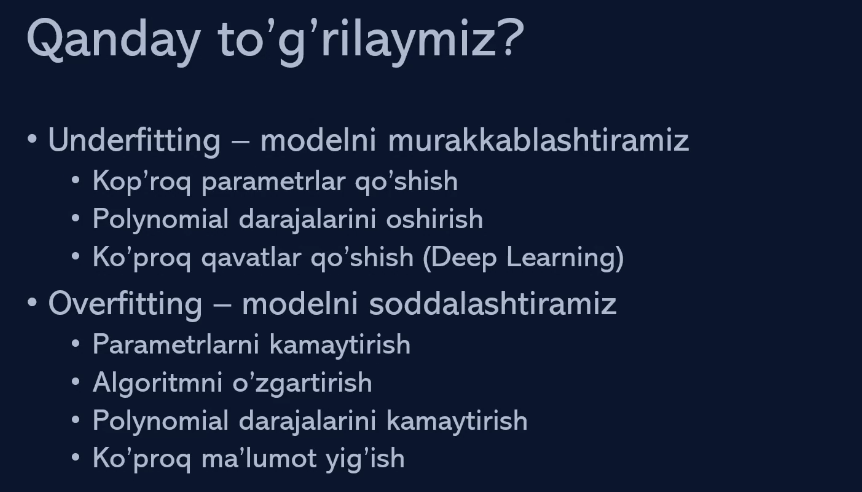

# **2. Klassifikatsiya (Classification)**

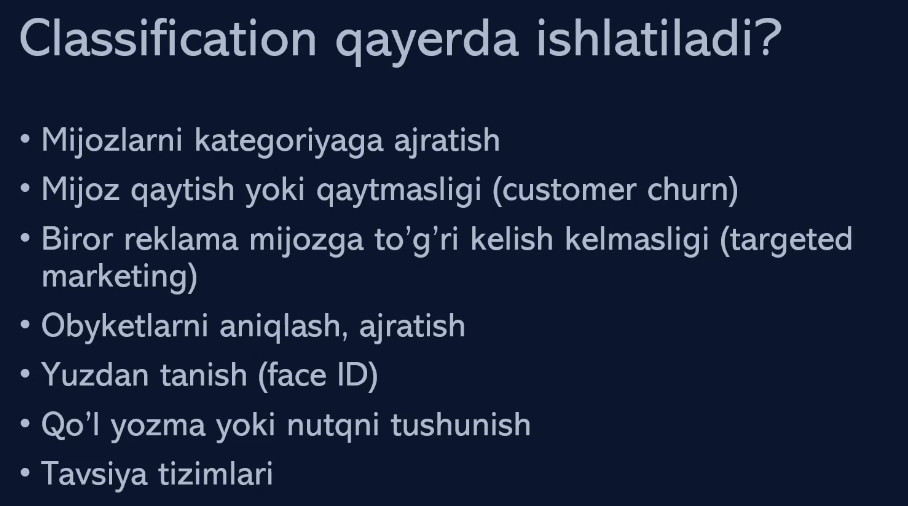

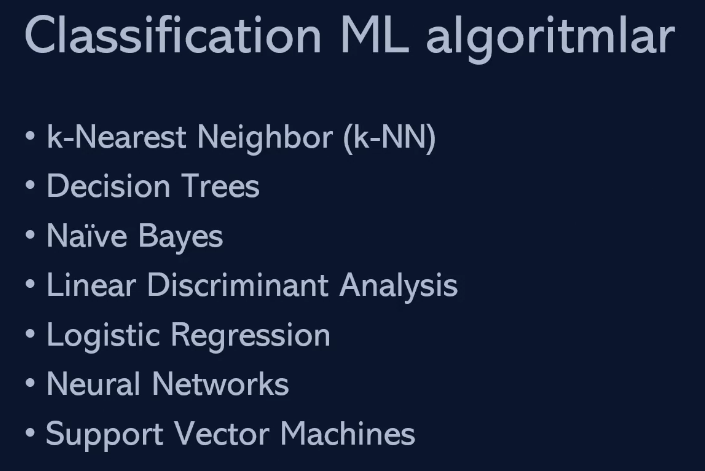

# **k-NN, Ko'krak saratonini aniqlash**


**Tavsif:**

Ko'krak saratoni dunyodagi ayollar orasida eng keng tarqalgan saraton hisoblanadi. Bu barcha saraton holatlarining 25 foizini tashkil qiladi. Ko'krark saratoni ko'krakdagi hujayralar nazoratsiz o'sishidan boshlanadi. Ushbu hujayralar odatda rentgen nurlari orqali ko'rish mumkin bo'lgan o'simtalarni tahlil qilish orqali aniqlanadi.

**Ushbu ma'lumotlar to'plami `Kaggle`dan olingan.**


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/breast-cancer.csv"
df = pd.read_csv(url)
df.sample(10)

In [ ]:
df.shape

Datasetda ko'krakdagi o'simta haqida ma'lumotlarni jamlagan.
 `diagnosis` ustuni esa o'simta rak (`M` - malignant) yoki rak emas (`B` - benign) anglatadi.

In [ ]:
df['diagnosis'].value_counts()

Keling bu qiymatlarni 0 va 1 ga o'zgartiramiz. `M`->1, `B`->0

Buning uchun yoki `sklearn` tarkibidagi `LabelEncoder` dan yoki `pandas`dagi `.replace()` metodidan foydalanish mumkin. Biz ikkisini ham qoldiramiz.

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'].values)
df['diagnosis'].value_counts()

In [ ]:
# df['diagnosis'] = df['diagnosis'].replace({"M":1, "B":0})
# df['diagnosis'].value_counts()

`ID` ustunini tashlab yuboramiz

In [ ]:
df.drop(columns=['id'], inplace=True)

In [ ]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

In [ ]:
df.corrwith(df['diagnosis']).abs().sort_values(ascending=False)

**ML ga tayyorlaymiz**

In [ ]:
X = df.drop('diagnosis', axis=1).values
y = df['diagnosis']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

**ML**

In [ ]:
# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) # k-ni qiymati

knn.fit(X_train, y_train)

In [ ]:
y_predict = knn.predict(X_test)

> **Baholash**


**Jaccard index**

In [ ]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

**Confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [ ]:
confusion_matrix(y_test, y_predict)

**Precision, recall, F1**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

**Cross-validation yordamida tekshiramiz**

In [ ]:
# Cross validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)

# Modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y, predict))

**Eng yaxshi k ni topish**




> `for` yordamida

In [ ]:
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

> `Grid Search` yordamida

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

In [ ]:
knn_gscv.cv_results_['rank_test_score']

In [ ]:
knn_gscv.best_params_

In [ ]:
knn_gscv.best_score_

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()

# **Portfolio uchun amaliyot. Diabet kasalligiga tashxis qo'yish.**

In [ ]:
url = 'https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv'
dfd = pd.read_csv(url)
dfd.head()

In [ ]:
dfd.shape

In [ ]:
dfd.Outcome.value_counts()

In [ ]:
corr_matrix = dfd.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

In [ ]:
dfd.corrwith(dfd['Outcome']).abs().sort_values(ascending=False)

In [ ]:
X = dfd.drop('Outcome', axis=1).values
Y = dfd['Outcome'].copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=11)

# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11) # k-ni qiymati

knn.fit(X_train, Y_train)

In [ ]:
y_predict = knn.predict(X_test)

In [ ]:
from sklearn.metrics import jaccard_score

jaccard_score(Y_test, y_predict)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(Y_test, y_predict), annot=True)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(Y_test, y_predict)
recall = recall_score(Y_test, y_predict)
f1 = f1_score(Y_test, y_predict)
accuracy = accuracy_score(Y_test, y_predict)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_predict))

In [ ]:
# Cross validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X = X, y = Y, cv = 5)

# Modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(Y, predict))

**Eng yaxshi k ni `for` sikli yordamida topish.**

In [ ]:
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn.fit(X_train, Y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(Y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()